# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).


## Import packages

In [1]:
import numpy as np
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd

## Review the data

Run the following cell to load the data and view the first few rows.

In [2]:
# load the training dataset
data = pd.read_csv('/kaggle/input/flights/challenges/data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          414 non-null    float64
 1   house_age                 414 non-null    float64
 2   transit_distance          414 non-null    float64
 3   local_convenience_stores  414 non-null    int64  
 4   latitude                  414 non-null    float64
 5   longitude                 414 non-null    float64
 6   price_per_unit            414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [4]:
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [5]:
data.isnull().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train and evaluate a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

In [6]:
X = data.iloc[:,:-1].values
y = data.price_per_unit.values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
# Define preprocessing for numeric columns (scale them)
numeric_features = np.arange(0,data.shape[1]-1).tolist()
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = []
# categorical_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', svm.SVR())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, y_train)

print (model)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', SVR())])


In [8]:
y_hat = model.predict(X_test)

In [9]:
print(f"The root mean squared error is: {mean_squared_error(y_hat,y_test , squared = False)}")

The root mean squared error is: 8.125138486183161


Text(0.5, 1.0, 'Predictions vs ground truths')

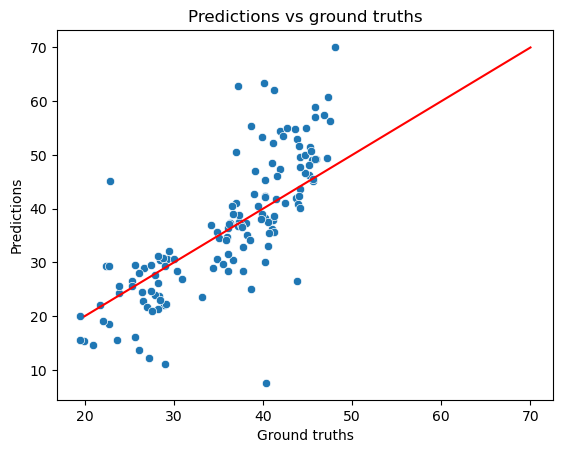

In [10]:
sns.scatterplot(x = y_hat , y = y_test)
sns.lineplot(x = [20,70] , y = [20,70] ,c = "r" )
plt.ylabel("Predictions")
plt.xlabel("Ground truths")
plt.title("Predictions vs ground truths")


## Trying out GradientBoostingRegressor


The root mean squared error is: 6.802066488199378


Text(0.5, 1.0, 'Predictions vs ground truths')

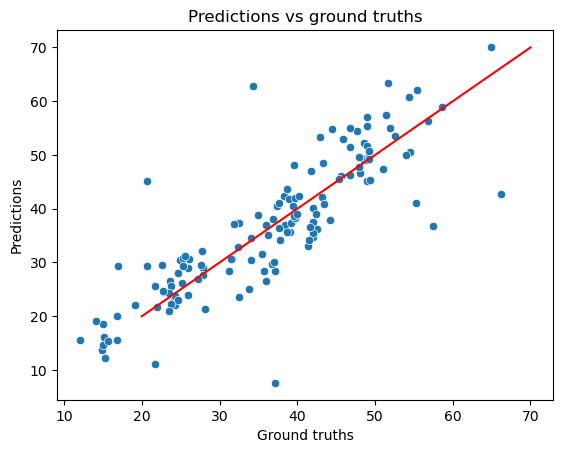

In [11]:

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])
model = pipeline.fit(X_train, y_train)
y_hat = model.predict(X_test)
print(f"The root mean squared error is: {mean_squared_error(y_hat,y_test , squared = False)}")
sns.scatterplot(x = y_hat , y = y_test)
sns.lineplot(x = [20,70] , y = [20,70] ,c = "r" )
plt.ylabel("Predictions")
plt.xlabel("Ground truths")
plt.title("Predictions vs ground truths")


## Savd the model

In [12]:
import joblib

# Save the model as a pickle file
filename = 'real_estate.pkl'
joblib.dump(model, filename)

['real_estate.pkl']

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [13]:
loaded_model = joblib.load("/kaggle/working/"+ filename)

In [14]:
new_test = np.array([[2013.167,16.2,289.3248,5,24.98203,121.54348]
,[2013.000,13.6,4082.015,0,24.94155,121.50381]])

In [15]:
loaded_model.predict(new_test)

array([46.78777931, 15.63511437])

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude | price_per_unit |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- | ---- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|46.78777931|
|2013.000|13.6|4082.015|0|24.94155|121.50381|15.63511437|